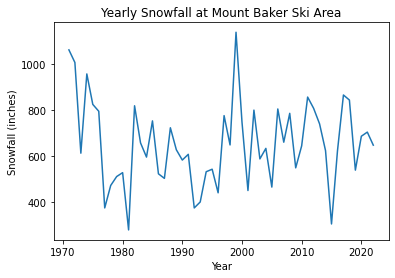

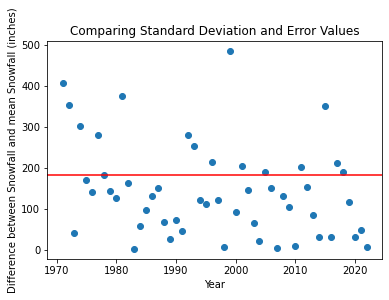

[408.8461538461538,
 353.8461538461538,
 303.8461538461538,
 281.1538461538462,
 377.1538461538462,
 281.1538461538462,
 255.1538461538462,
 215.1538461538462,
 485.8461538461538,
 205.1538461538462,
 190.1538461538462,
 202.8461538461538,
 351.1538461538462,
 211.8461538461538,
 189.8461538461538]

In [35]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

col_list=['Years', 'Total_Snowfall']
data = pd.read_csv("FinalProjectData.csv", usecols = col_list)

y = data['Total_Snowfall']
x = data['Years']




plt.plot(x, y)
plt.ylabel('Snowfall (inches)')
plt.xlabel('Year')
plt.title('Yearly Snowfall at Mount Baker Ski Area')
plt.show()

#Making loops to make lists of the data and then adding them to a series.


mean_snowfall = np.mean(y)   
std_snowfall = np.std(y)
error_values = []
for value in y:
    difference = abs(mean_snowfall - value)
    error_values.append(difference)
error_values


linkingvalues = pd.Series(error_values, x)

plt.scatter(x, error_values)
plt.axhline(std_snowfall, color='r', linestyle='-')
plt.ylabel('Difference between Snowfall and mean Snowfall (inches)')
plt.xlabel('Year')
plt.title('Comparing Standard Deviation and Error Values')
plt.show()

above_average = []
for n in error_values:
    if n > std_snowfall:
        above_average.append(n)


    

    
    




        

In [65]:
window_size = int(len(x)/2)

i = 0

moving_averages = []

while i < (len(y) - window_size + 1):

    window = y[i : i + window_size]
    window_average = round(sum(window) / window_size, 2)
    moving_averages.append(window_average)

    i += 1

plt.plot(moving_averages)
plt.xlabel('Moving Average (Years)')
plt.ylabel('Snowfall (inches)')
plt.show()

decadal_mean = [0] * 5

s = 9
i = 0
j = 0
while s < 50:
    decadal_mean[j] = np.mean(y[i:s])
    i =+ 10
    s =+ 10
    j =+ 1
print(str(decadal_mean))

52

In [ ]:
year_series = []
for year in x:
    year_series.append[x]

snowfall_series = []
for snowfall in y:
    snowfall_series.append[x]

Years_and_Snowfall = pd.Series(x, y)

average_annual_snowfall = np.mean(snowfall_series)

for value in snowfall_series:
    if value < average_annual_snowfall:
